## Introducción a Pandas (5)

Durante el curso vamos a estar desarrollando los aspectos prácticos utilizando Python. Para aquellos que no estén muy familiarizados con el lenguaje, acá tenemos una introducción a las bibliotecas que más vamos a manejar.

Si necesitan más material, algunos libros para consultar (si los quieren, los podemos compartir):
* Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython
* Pandas for Everyone: Python Data Analysis

Cuentan con una serie de notebooks introductorias:
* Creación, lectura y escritura.
* Indexando, seleccionando y asignando.
* Tipos de datos, valores faltantes, funciones de resumen.
* Agrupamientos y orden.
* **Renombrado y combinación.**

Las notebooks se encuentran basadas en diversos tutoriales de Kaggle, DataCamp, RealPython y cursos de la Unversidad de Berkeley.

A veces nos puede tocar un ``DataFrame`` con nombres de index y columnas que no nos sirven o que preferimos que se llamasen de otra forma. Vamos a ver cómo renombrar.

Vamos a trabajar con el ``DataFrame`` de tweets que teníamos en la notebook anterior.

In [ ]:
import pandas as pd

In [ ]:
df_tweets = pd.read_csv('tweets.csv',index_col = 0)
df_tweets

### Renombrado

La función ``rename`` pemite cambiar el nombre del index y/o columnas.

Por ejemplo, para cambiar la columna de ``retweeted_id`` a ``retweet_id``:

(recuerden que el ``inplace`` hace que los cambios queden registrados en el ``DataFrame`` original)

In [ ]:
df_tweets.rename(columns={'retweeted_id': 'retweet_id'}, inplace=True)

In [ ]:
df_tweets

Para modificar elementos del índice simplemente tenemos que indicar que los cambios se realizan sobre ``index``. Notar que no da error si se pasan keys en el diccionario que no existen en el ``DataFrame``.

In [ ]:
df_tweets.rename(index={915945775871545345: 'firstEntry', 1: 'secondEntry'})

Por lo general, el index no se modifica tan frecuentemente como las columnas. Para modificar el index se suele usar el ``set_index`` que ya estuvimos utilizando anteriormente.

Así como renombramos las columnas y los valores del índice, también le podemos dar nombre a los ejes. Para eso está ``rename_axis``.

In [ ]:
df_tweets.rename_axis('tweets', axis='rows') \
         .rename_axis('fields',axis='columns')

### Combinación

Es posible que necesitemos combinar diferentes ``DataFrames`` o ``Series`` de formas no triviales. Para eso, Pandas provee métodos que funcionan de forma similar a las operaciones entre múltiples tablas que conocemos de Bases de Datos. 

Vamos a probar:

* ``concat`` para combinar ``DataFrame`` por filas o por columnas.
* ``merge`` para combinar datos en columnas o índices comunes.
* ``join`` para combinar datos en una columna o index.

#### Concat

El método más simple es ``concat``. Dada una lista de elementos, esta función los une considerando uno de los ejes.

Esta función es útil cuando tenemos datos en diferentes ``DataFrames`` o ``Series`` pero que tienen las mismas columnas.

Por ejemplo, tenemos dos ``DataFrames`` simples y queremos unirlos.

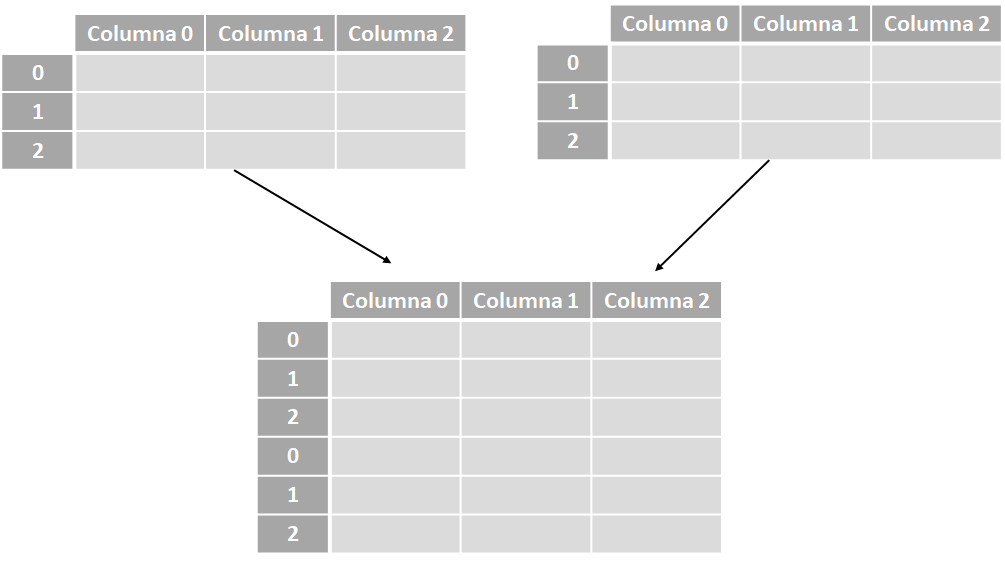

In [ ]:
df1 = pd.DataFrame( {
        'id': ['1', '2', '3', '4', '5'],
        'Feature1': ['A', 'C', 'E', 'G', 'I'],
        'Feature2': ['B', 'D', 'F', 'H', 'J']},
        columns=['id','Feature1','Feature2'])
df1

In [ ]:
df2 = pd.DataFrame( {
        'id': ['1', '2', '6', '7', '8'],
        'Feature1': ['K', 'M', 'O', 'Q', 'S'],
        'Feature2': ['L', 'N', 'P', 'R', 'T']},
        columns=['id','Feature1','Feature2'])
df2

Para el concat necesitamos indicar los nombres de los ``DataFrames`` a concatenar en una lista.

In [ ]:
df_concat = pd.concat([df1,df2])
df_concat

Ahora tenemos los ``DataFrame`` concatenados en ``df_concat``, pero las etiquetas del índice parecieran estar mal, no se ajustaron de forma automática, sino que se mantuvieron las etiquetas originales de cada ``DataFrame``.

Si queremos que se ajusten automáticamete, tenemos que setear el ``ignore_index``.

In [ ]:
df_concat = pd.concat([df1,df2],ignore_index=True)
df_concat

También podemos agregar una opción de darle un nombre a los ``DataFrames`` luego de la concatenación para saber qué registros vinieron de cada uno. Esto puede ayudar a obtener más fácil los registros luego utilizando el ``loc``.

Para esto, hay que definir el argumento ``keys``.

In [ ]:
pd.concat([df1,df2],keys=['x','y'])

``concat`` también acepta un diccionario como parámetro donde se le puede indicar directamente a que key mapea cada ``DataFrame``.

In [ ]:
pd.concat({'x':df1,'y':df2})

Tener en cuenta que cada operación implica copiar los ``DataFrame`` concatenados, con lo que puede afectar la performance.

También se puede concatenar en base a las columnas, para ello hay que especificar el parámetro ``axis``.

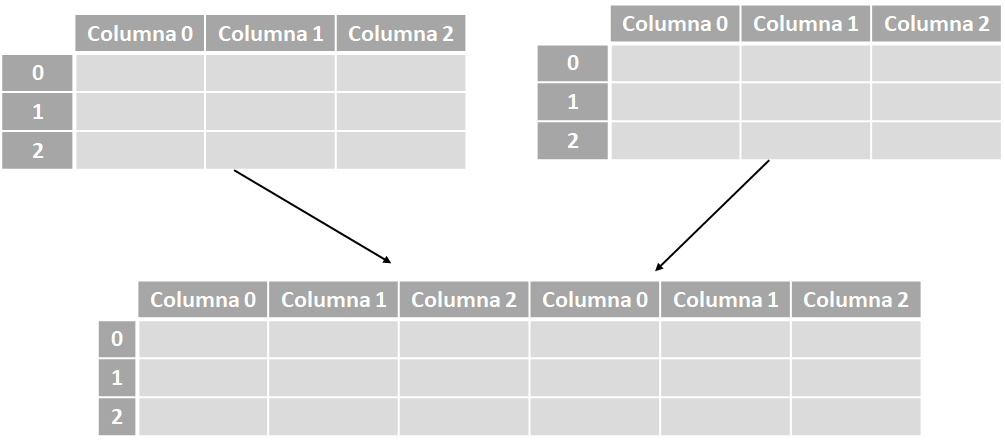

In [ ]:
pd.concat([df1,df1],axis=1)

#### Merge

La lógica de esta operación es la misma que la de Bases de Datos. Tenemos las mismas opciones: 

* ``how='outer'``. Combina el resultado de joins full de izquierda y derecha. El ``DataFrame`` resultante va a tener todos los registros de ambos ``DataFrame`` y va a completar con ``na`` para los matchings que falten.
* ``how='inner'``. Combina solo los registros que se encuentran en ambos ``DataFrame``.
* ``how='right'``. Produce el set completo de registros del ``DataFrame`` de la derecha con los registros que matcheen del primero. Si no hay match, se completa con ``na``.
* ``how='left'``. Lo mismo que el anterior, pero tomando como base el ``DataFrame`` de la izquierda.

En todos los casos hay que definir sobre qué columna o columnas se efectúan los joins.

Por defecto va a agregar sufijos a las columnas para que no queden dupicadas. Esos sufijos pueden costumizarse usando el parámetro ``suffixes`` que recibe una tupla.

In [ ]:
# outer
pd.merge(df1, df2, on='id', how='outer')

In [ ]:
# outer seteando los suffixes y seteando las columnas de ambos dfs
pd.merge(df1, df2, left_on='id',right_on='id',how='outer',suffixes=('_left','_right'))


In [ ]:
# inner
pd.merge(df1, df2, on='id', how='inner')

In [ ]:
# right
pd.merge(df1, df2, on='id', how='right')

In [ ]:
# left
pd.merge(df1, df2, on='id', how='left')

Finalmente, también podemos querer hacer un join considerando los índices de los ``DataFrame``. Para eso es necesario especificar el uso de los índices.

In [ ]:
pd.merge(df1, df2, right_index=True, left_index=True)

#### Join

Mientras que ``merge`` es una función de módulo, ``join`` es una función del objeto. Esto permite especificar solo un ``DataFrame`` al cual se le aplicará el ``join`` con el ``DataFrame`` que se le pasa por parámetro. 

En términos de implementación, ``join`` se basa en el ``merge``, pero provee una forma más simplificada. Por defecto, ``join`` intentaré hacer un left join sobre los índices. Si lo que se desea es hacer un ``join`` sobre columnas como se puede hacer con un ``merge``, habría que setear esas columnas como índices.

Al igual que ``merge``, ``join`` tiene algunos parámetros:
* ``other``. Único parámetro obligatorio. Define el ``DataFrame`` que se utilizará en el join. También acepta una lista de ``DataFrame``.
* ``on``. Especifica opcionalmente una columna o index name para el ``DataFrame`` de la izquierda. Si no se setea, el join se hará considerando los índices.
* ``how``. La misma opción que para el ``merge``. 
* ``lsuffix``, ``rsuffix``. Similar al ``suffixes`` de ``merge``. Obligatorio si hay columnas que se superponen. No tiene ningún efecto si en ``other`` se pasa una lista.
* ``sort``. Ordena por el join key.


In [ ]:
df1.join(df2,lsuffix='_1')

En nuestro df1 no teníamos seteado un índice, con lo que usó el índice por defecto encontrando matching entre ambos dfs. Esto es lo mismo que el último merge que habíamos hecho.

Si seteáramos ``id`` como index en ambos dfs. 

In [ ]:
df1.set_index('id').join(df2.set_index('id'),lsuffix='_1')

### Pivot



Pivot permite darle una nueva forma a los datos de forma que sea sencillo entenderlos y analizarlos. Suele utilizarse para mostrar la relación entre dos columnas que de otra forma no podrían ser observadas. También son utilizadas para agrupar columnas similares para obtener totales, promedios u otras agregaciones de datos.

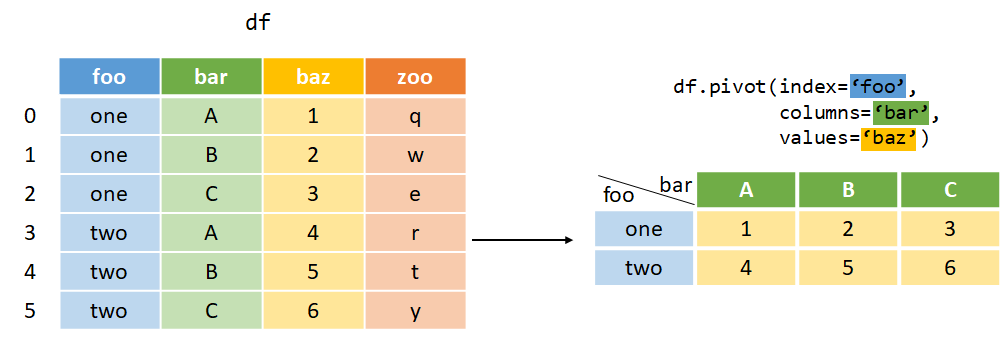

``pivot`` tiene tres parámetros:
* ``index``. Qué columna tiene que utilizarse para identificar y ordenar las filas de forma vertical?
* ``columns``. Qué columnas serán utilizadas para crear las nuevas columnas en el reshaped ``DataFrame``. Cada nuevo valor en la columna creará una nueva columna en el nuevo ``DataFrame``.
* ``values``. Qué columna o columnas deberán ser utilizadas para completar los valores en las celdas del nuevo ``DataFrame``. 

Todas combinaciones de ``index`` y ``columns`` deben ser únicas, caso contrario dará error.

Vamos a crear un ``DataFrame`` nuevo

In [ ]:
import numpy as np
import datetime

dfp = pd.DataFrame({
        "variable": ["A"] * 2 + ["B"] * 2 + ["C"] * 2,
        "value": np.random.randn(6),
        "value 2": np.random.randn(6),
        "date": [datetime.datetime(2021, i, 1) for i in range(1, 3)] * 3,
     }
)

dfp

In [ ]:
dfp.pivot(index="date", columns="variable", values="value")

Si este parámetro es omitido, y el ``DataFrame`` de input tiene más de una columna que no es utilizada como columna o index, entonces el ``DataFrame`` resultante tendrá niveles jerárquicos de columnas, cuyo primer nivel indica la columna de valor.

In [ ]:
dfp.pivot(index="date", columns="variable")

Mientras que ``pivot`` provee opciones de propósito general para varios tipos de datos, también está la opción de usar ``pivot_table`` para hacer pivots a partir de la agregación de datos numéricos.

``pivot_table`` tiene algunos argumentos:

* ``data``. El ``DataFrame`` a pivotear.
* ``values``. Una columna o lista de columnas para agregar.
* ``index``. Una columna, Grouper, array que tiene la misma longitud que los datos o lista de ellos. 
* ``columns``. Una columna, Grouper, array que tiene la misma longitud que los datos o lista de ellos. 
* ``aggfunc``. Función para usar en la agregación. Por default: ``numpy.mean``.

In [ ]:
dfp_t = pd.DataFrame({
       "A": ["one", "one", "two", "three"] * 3,
       "B": ["A", "B", "C"] * 4,
       "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
       "D": np.random.randn(12),
       "E": np.random.randn(12),
       "F": [datetime.datetime(2013, i, 1) for i in range(1, 7)]
           + [datetime.datetime(2013, i, 15) for i in range(1, 7)],
        }
)

In [ ]:
pd.pivot_table(dfp_t, values="D", index=["A", "B"], columns=["C"])

In [ ]:
pd.pivot_table(dfp_t, values="D", index=["B"], columns=["A", "C"], aggfunc=np.sum)

Qué usar?

Si los resultados del pivot van a tener más de una entrada para cualquier combinación de ``index`` y ``column``, no queda otra que usar el ``pivot_table``. Cualquier ``pivot`` puede ser transformado en un ``pivot_table``, pero no al contrario. 